> We will see a cube moving on the screen

In [1]:
%cd -q ..
from objects.static.voxel import VoxelObject
from objects.dynamic_object import MovableObjectFactory, DynamicObjectFactory, MovableBaseObject
from objects.trajectory import WaypointLinearTrajectory
MovableVoxel = MovableObjectFactory.create_movable_object_class(VoxelObject, MovableBaseObject)
DynamicVoxel = DynamicObjectFactory.create_dynamic_object_class(MovableVoxel)

In [2]:
import numpy as np
orientations = np.random.uniform(size=(3, 4))
orientations = orientations / np.linalg.norm(orientations, axis=-1, keepdims=True)
waypoints = np.concatenate((np.random.uniform(size=(3, 3)), orientations), axis=-1)
dynamic_voxel = DynamicVoxel(base_position=[1, 1, 1],
                             base_orientation=[0, 0, 0, 1],
                             half_extents=[0.2, 0.2, 0.2],
                             move_mode='po',
                             trajectory=WaypointLinearTrajectory(waypoints=waypoints))

In [3]:
from time import sleep
def create_traj(dynamic_object, distance):  
    gifs = []    
    p.resetSimulation()
    p.setAdditionalSearchPath(pybullet_data.getDataPath())
    plane = p.createCollisionShape(p.GEOM_PLANE)
    p.createMultiBody(0, plane)    
    p.configureDebugVisualizer(p.COV_ENABLE_GUI, 0, lightPosition = [0, 0, 0.1])
    p.resetDebugVisualizerCamera(
        cameraDistance=distance,
        cameraYaw=10,
        cameraPitch=-45,
        cameraTargetPosition=[0, 0, 0])    
    dynamic_object.load()
    for timestep in np.linspace(0, len(dynamic_object.trajectory.waypoints)-1, 100):
        dynamic_object.set_config_at_time(timestep)
        p.performCollisionDetection()
        sleep(0.1)
        gifs.append(p.getCameraImage(width=360, height=360, lightDirection=[1, 1, 1], shadow=1,
                                         renderer=p.ER_BULLET_HARDWARE_OPENGL)[2]) 
    return gifs        

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import pybullet as p
import pybullet_data
import numpy as np
from utils.utils import save_gif
p.connect(p.GUI)
plt.clf()
plt.close('all')
gifs = create_traj(dynamic_voxel, 2)
p.disconnect()    
save_gif(gifs, 'data/visualization/moving_cube.gif')


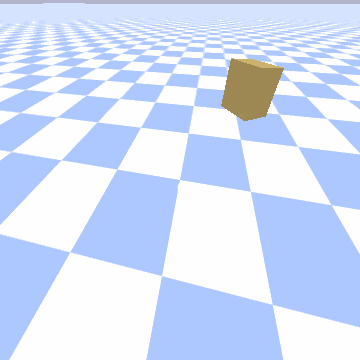

In [7]:
from IPython.display import HTML
import base64
b64 = base64.b64encode(open('data/visualization/moving_cube.gif','rb').read()).decode('ascii')
display(HTML(f'<img src="data:image/gif;base64,{b64}" />'))